<a href="https://colab.research.google.com/github/AIhexNICK-MAIL-RU/big_data/blob/main/%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Установка PySpark

In [1]:
!apt-get update

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,776 kB]
Get:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,255 kB]
Hit:13 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:14 http://archiv

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [5]:
!wget -q https://downloads.apache.org/spark/spark-3.4.0/spark-3.4.0-bin-hadoop3.tgz

In [6]:
!tar -xvf spark-3.4.0-bin-hadoop3.tgz

spark-3.4.0-bin-hadoop3/
spark-3.4.0-bin-hadoop3/data/
spark-3.4.0-bin-hadoop3/data/streaming/
spark-3.4.0-bin-hadoop3/data/streaming/AFINN-111.txt
spark-3.4.0-bin-hadoop3/data/graphx/
spark-3.4.0-bin-hadoop3/data/graphx/followers.txt
spark-3.4.0-bin-hadoop3/data/graphx/users.txt
spark-3.4.0-bin-hadoop3/data/mllib/
spark-3.4.0-bin-hadoop3/data/mllib/als/
spark-3.4.0-bin-hadoop3/data/mllib/als/test.data
spark-3.4.0-bin-hadoop3/data/mllib/als/sample_movielens_ratings.txt
spark-3.4.0-bin-hadoop3/data/mllib/gmm_data.txt
spark-3.4.0-bin-hadoop3/data/mllib/sample_libsvm_data.txt
spark-3.4.0-bin-hadoop3/data/mllib/sample_svm_data.txt
spark-3.4.0-bin-hadoop3/data/mllib/sample_fpgrowth.txt
spark-3.4.0-bin-hadoop3/data/mllib/kmeans_data.txt
spark-3.4.0-bin-hadoop3/data/mllib/pic_data.txt
spark-3.4.0-bin-hadoop3/data/mllib/streaming_kmeans_data_test.txt
spark-3.4.0-bin-hadoop3/data/mllib/sample_linear_regression_data.txt
spark-3.4.0-bin-hadoop3/data/mllib/ridge-data/
spark-3.4.0-bin-hadoop3/data/

In [7]:
!pip install -q findspark

In [8]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.0-bin-hadoop3"

In [9]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

## Работа с RDD

In [10]:
words = sc.parallelize (
   ["scala", 
   "java", 
   "hadoop", 
   "spark", 
   "akka",
   "spark",
   "hadoop", 
   "pyspark",
   "bigdata",
    "python"]
)

In [11]:
words

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:287

In [12]:
words.count()

10

In [13]:
def mapper(w):
  return (w, 1)

In [14]:
words.map(mapper)

PythonRDD[2] at RDD at PythonRDD.scala:53

In [15]:
transform = words.map(mapper)

In [16]:
transform.collect()

[('scala', 1),
 ('java', 1),
 ('hadoop', 1),
 ('spark', 1),
 ('akka', 1),
 ('spark', 1),
 ('hadoop', 1),
 ('pyspark', 1),
 ('bigdata', 1),
 ('python', 1)]

In [17]:
def reducer(a, b):
  return a + b

In [18]:
transform.reduceByKey(reducer)

PythonRDD[8] at RDD at PythonRDD.scala:53

In [19]:
transform = transform.reduceByKey(reducer)

In [20]:
transform.collect()

[('scala', 1),
 ('java', 1),
 ('hadoop', 2),
 ('akka', 1),
 ('bigdata', 1),
 ('python', 1),
 ('spark', 2),
 ('pyspark', 1)]

## DataFrame

In [23]:
df = spark.read.csv('power.csv', inferSchema=True, header=True)

In [ ]:
## Обзор

In [24]:
df.count()

45842

In [25]:
df.dtypes

[('country', 'string'),
 ('year', 'int'),
 ('quantity', 'double'),
 ('category', 'int')]

In [26]:
df.take(2)

[Row(country='Austria', year=1996, quantity=5.0, category=1),
 Row(country='Austria', year=1995, quantity=17.0, category=1)]

## Практика 1. Загрузите данные из файла transactions.csv. Выведите 10 первых строчек

In [27]:
df_practice = spark.read.csv('transactions.csv', inferSchema=True, header=True)

In [39]:
df_practice.take(10)

[Row(Year=2017, Month=1, ID='t001', Product='A1', Amount=7, Price=2904, Total=20328, Cost=1200),
 Row(Year=2017, Month=1, ID='t002', Product='A2', Amount=2, Price=1896, Total=3792, Cost=1100),
 Row(Year=2017, Month=2, ID='t003', Product='A1', Amount=5, Price=2904, Total=14520, Cost=1200),
 Row(Year=2017, Month=2, ID='t004', Product='A4', Amount=1, Price=8618, Total=8618, Cost=4200),
 Row(Year=2017, Month=2, ID='t005', Product='A5', Amount=3, Price=5175, Total=15525, Cost=500),
 Row(Year=2017, Month=2, ID='t006', Product='_6', Amount=4, Price=3500, Total=14000, Cost=200),
 Row(Year=2017, Month=3, ID='t007', Product='_3', Amount=6, Price=1265, Total=7590, Cost=200),
 Row(Year=2017, Month=3, ID='t008', Product='_5', Amount=2, Price=5175, Total=10350, Cost=1200),
 Row(Year=2017, Month=4, ID='t009', Product='_8', Amount=3, Price=3760, Total=11280, Cost=1000),
 Row(Year=2017, Month=4, ID='t010', Product='_4', Amount=2, Price=8618, Total=17236, Cost=3400)]

In [ ]:
# Выборки

In [28]:
df_lim = df.select('country', 'year', 'quantity')
df_lim.take(1)

[Row(country='Austria', year=1996, quantity=5.0)]

In [29]:
df_lim = df_lim.withColumnRenamed('year', 'y')
df_lim

DataFrame[country: string, y: int, quantity: double]

In [30]:
df_lim.columns

['country', 'y', 'quantity']

In [ ]:
## Описание и статистики

In [31]:
df_lim.show()

+-------+----+--------+
|country|   y|quantity|
+-------+----+--------+
|Austria|1996|     5.0|
|Austria|1995|    17.0|
|Belgium|2014|     0.0|
|Belgium|2013|     0.0|
|Belgium|2012|    35.0|
|Belgium|2011|    25.0|
|Belgium|2010|    22.0|
|Belgium|2009|    45.0|
|Czechia|1998|     1.0|
|Czechia|1995|     7.0|
|Finland|2010|     9.0|
|Finland|2009|    13.0|
|Finland|2008|    39.0|
|Finland|2007|    21.0|
|Finland|2006|     0.0|
|Finland|2005|     0.0|
|Finland|2004|     0.0|
|Finland|2003|     0.0|
|Finland|2002|     0.0|
|Finland|2001|     0.0|
+-------+----+--------+
only showing top 20 rows



In [32]:
df_lim.describe().show()

+-------+-----------+------------------+------------------+
|summary|    country|                 y|          quantity|
+-------+-----------+------------------+------------------+
|  count|      45842|             45842|             45842|
|   mean|       null|2003.4071375594433|3308.8493340414425|
| stddev|       null| 7.321144854855669|24624.834888999634|
|    min|Afghanistan|              1990|           -1852.0|
|    max|   Zimbabwe|              2014|          769128.0|
+-------+-----------+------------------+------------------+



In [ ]:
## Сохранение

In [33]:
df_lim.write.format('com.databricks.spark.csv').option('header', 'true').save('df_lim.csv')

In [ ]:
## Вычисления

In [34]:
df_lim = df_lim.withColumn('quantity x 2', df_lim['quantity'] * 2)

In [35]:
df_grp = df_lim.groupBy('country')

In [36]:
df_sum = df_grp.sum('quantity', 'quantity x 2')

In [37]:
df_sum.show()

+-------------+------------------+------------------+
|      country|     sum(quantity)| sum(quantity x 2)|
+-------------+------------------+------------------+
|Côte d'Ivoire|             116.0|             232.0|
|         Chad|15961.143999999998|31922.287999999997|
|     Paraguay| 58566.31999999997|117132.63999999994|
|        Yemen|              32.0|              64.0|
|      Senegal| 36765.43337646103| 73530.86675292205|
|       Sweden|           18754.0|           37508.0|
|     Kiribati|57.980000000000004|115.96000000000001|
|       Guyana| 135681.6253494831| 271363.2506989662|
|  Philippines| 318522.7851919996| 637045.5703839991|
|      Eritrea|          405246.0|          810492.0|
|       Jersey|211.46726862302495| 422.9345372460499|
|        Tonga| 56.06200000000004|112.12400000000008|
|     Djibouti|              50.0|             100.0|
|    Singapore|            420.82|            841.64|
|     Malaysia| 42562.39999999998| 85124.79999999996|
|         Fiji|     159814.5

In [ ]:
## Свободные таблицы

In [38]:
df_lim.groupby('country').pivot('y').sum('quantity').show()

+-------------+------------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|      country|              1990|              1991|              1992|              1993|             1994|             1995|             1996|             1997|              1998|              1999|              2000|               2001|              2002|              2003|              2004|              2005|              2006|             2007|              2008|              2009|              2010|              2011|              2012|              2013|              2014|
+-------------+-----------

## Практика 2. Выведите максимальную и минимальную (2 датафрейма) количество (Amount) по продукту

In [43]:
df_pr_max = df_practice.groupby('Product').max('Amount')
df_pr_max.show()

+-------+-----------+
|Product|max(Amount)|
+-------+-----------+
|     _5|          6|
|     _2|          8|
|     A2|          2|
|     _8|         10|
|     _3|          7|
|     _4|          3|
|     _6|          4|
|     A4|          3|
|     A5|          7|
|     A1|          9|
+-------+-----------+



In [44]:
df_pr_min = df_practice.groupby('Product').min('Amount')
df_pr_min.show()

+-------+-----------+
|Product|min(Amount)|
+-------+-----------+
|     _5|          1|
|     _2|          1|
|     A2|          2|
|     _8|          1|
|     _3|          2|
|     _4|          1|
|     _6|          4|
|     A4|          1|
|     A5|          2|
|     A1|          2|
+-------+-----------+



In [ ]:
## Подвыборки

In [45]:
df['quantity'] > 184264

Column<'(quantity > 184264)'>

In [46]:
df.where((df['quantity'] > 184264)).show()

+-------------+----+--------+--------+
|      country|year|quantity|category|
+-------------+----+--------+--------+
|United States|2014|367987.0|       2|
|United States|2013|384439.0|       2|
|United States|2012|370625.0|       2|
|United States|2011|310909.0|       2|
|United States|2010|335418.0|       2|
|United States|2009|230589.0|       2|
|United States|2008|226570.0|       2|
|United States|2007|221771.0|       2|
|United States|2005|314655.0|       2|
|United States|2004|243916.0|       2|
|United States|1996|226319.0|       2|
|United States|1995|292568.0|       2|
|United States|1994|230254.0|       2|
|United States|1993|247909.0|       2|
|United States|2014|448216.0|       2|
|United States|2013|458711.0|       2|
|United States|2012|433505.0|       2|
|United States|2011|382566.0|       2|
|United States|2010|406606.0|       2|
|United States|2009|296903.0|       2|
+-------------+----+--------+--------+
only showing top 20 rows



In [48]:
df_filter = df.where((df['quantity'] > 184264) & (df['country'] != 'United States'))
df_filter.show()

+-------+----+--------+--------+
|country|year|quantity|category|
+-------+----+--------+--------+
+-------+----+--------+--------+



# Практика 3. Выведите список всех, товаров, которых хоть когда-то было больше 5-ти штук


In [52]:
df_pr_max.where((df_pr_max['max(Amount)'] > 5)).show()

+-------+-----------+
|Product|max(Amount)|
+-------+-----------+
|     _5|          6|
|     _2|          8|
|     _8|         10|
|     _3|          7|
|     A5|          7|
|     A1|          9|
+-------+-----------+



## SQL

In [53]:
df.show()

+-------+----+--------+--------+
|country|year|quantity|category|
+-------+----+--------+--------+
|Austria|1996|     5.0|       1|
|Austria|1995|    17.0|       1|
|Belgium|2014|     0.0|       1|
|Belgium|2013|     0.0|       1|
|Belgium|2012|    35.0|       1|
|Belgium|2011|    25.0|       1|
|Belgium|2010|    22.0|       1|
|Belgium|2009|    45.0|       1|
|Czechia|1998|     1.0|       1|
|Czechia|1995|     7.0|       1|
|Finland|2010|     9.0|       1|
|Finland|2009|    13.0|       1|
|Finland|2008|    39.0|       1|
|Finland|2007|    21.0|       1|
|Finland|2006|     0.0|       1|
|Finland|2005|     0.0|       1|
|Finland|2004|     0.0|       1|
|Finland|2003|     0.0|       1|
|Finland|2002|     0.0|       1|
|Finland|2001|     0.0|       1|
+-------+----+--------+--------+
only showing top 20 rows



In [54]:
df.createOrReplaceTempView('power')

In [55]:
spark.sql('SELECT * FROM power').show()

+-------+----+--------+--------+
|country|year|quantity|category|
+-------+----+--------+--------+
|Austria|1996|     5.0|       1|
|Austria|1995|    17.0|       1|
|Belgium|2014|     0.0|       1|
|Belgium|2013|     0.0|       1|
|Belgium|2012|    35.0|       1|
|Belgium|2011|    25.0|       1|
|Belgium|2010|    22.0|       1|
|Belgium|2009|    45.0|       1|
|Czechia|1998|     1.0|       1|
|Czechia|1995|     7.0|       1|
|Finland|2010|     9.0|       1|
|Finland|2009|    13.0|       1|
|Finland|2008|    39.0|       1|
|Finland|2007|    21.0|       1|
|Finland|2006|     0.0|       1|
|Finland|2005|     0.0|       1|
|Finland|2004|     0.0|       1|
|Finland|2003|     0.0|       1|
|Finland|2002|     0.0|       1|
|Finland|2001|     0.0|       1|
+-------+----+--------+--------+
only showing top 20 rows



In [56]:
spark.sql('SELECT country, sum(quantity) FROM power GROUP BY country').show()

+-------------+------------------+
|      country|     sum(quantity)|
+-------------+------------------+
|Côte d'Ivoire|             116.0|
|         Chad|15961.143999999998|
|     Paraguay| 58566.31999999997|
|        Yemen|              32.0|
|      Senegal| 36765.43337646103|
|       Sweden|           18754.0|
|     Kiribati|57.980000000000004|
|       Guyana| 135681.6253494831|
|  Philippines| 318522.7851919996|
|      Eritrea|          405246.0|
|       Jersey|211.46726862302495|
|        Tonga| 56.06200000000004|
|     Djibouti|              50.0|
|    Singapore|            420.82|
|     Malaysia| 42562.39999999998|
|         Fiji|     159814.598826|
|       Turkey|            5174.0|
|       Malawi|          128263.7|
|         Iraq|              28.0|
|      Germany|          809799.0|
+-------------+------------------+
only showing top 20 rows



In [57]:
## Соединение
from pyspark.sql import Row

In [58]:
row1 = Row("name", "pet", "count")
row2 = Row("name", "pet2", "count2")

In [59]:
df1 = sc.parallelize([
    row1("Sue", "cat", 16),
    row1("Kim", "dog", 1),    
    row1("Bob", "fish", 5),
    row1("Libuse", "horse", 1)
    ]).toDF()

df2 = sc.parallelize([
    row2("Sue", "eagle", 2),
    row2("Kim", "ant", 179),    
    row2("Bob", "lizard", 5),
    row2("Ferdinand", "bees", 23)
    ]).toDF()

In [60]:
df1.show()

+------+-----+-----+
|  name|  pet|count|
+------+-----+-----+
|   Sue|  cat|   16|
|   Kim|  dog|    1|
|   Bob| fish|    5|
|Libuse|horse|    1|
+------+-----+-----+



In [61]:
df2.show()

+---------+------+------+
|     name|  pet2|count2|
+---------+------+------+
|      Sue| eagle|     2|
|      Kim|   ant|   179|
|      Bob|lizard|     5|
|Ferdinand|  bees|    23|
+---------+------+------+



In [62]:
df1.join(df2, 'name', how='inner').show()

+----+----+-----+------+------+
|name| pet|count|  pet2|count2|
+----+----+-----+------+------+
| Bob|fish|    5|lizard|     5|
| Kim| dog|    1|   ant|   179|
| Sue| cat|   16| eagle|     2|
+----+----+-----+------+------+



## Практика 4. При помощи операции соединения выведите максимальное, минимальное и среднее (avg) количество (Amount) по продукту

In [71]:
result = df_pr_max.join(df_pr_min, 'Product', how='inner').show()
#max('Amount').

+-------+-----------+-----------+
|Product|max(Amount)|min(Amount)|
+-------+-----------+-----------+
|     _5|          6|          1|
|     _2|          8|          1|
|     A2|          2|          2|
|     _8|         10|          1|
|     _3|          7|          2|
|     _4|          3|          1|
|     _6|          4|          4|
|     A4|          3|          1|
|     A5|          7|          2|
|     A1|          9|          2|
+-------+-----------+-----------+



In [72]:
df_pr_avg = df_practice.groupBy('Product').avg('Amount').show()
#df_pr_max.join(df_pr_min, 'Product', how='inner').show()

+-------+------------------+
|Product|       avg(Amount)|
+-------+------------------+
|     _5|3.5454545454545454|
|     _2|              4.75|
|     A2|               2.0|
|     _8|               3.5|
|     _3| 4.285714285714286|
|     _4|               2.0|
|     _6|               4.0|
|     A4|               2.0|
|     A5|               4.0|
|     A1|               5.6|
+-------+------------------+



In [73]:
result.join(df_pr_avg, 'Product', how='inner').show()

AttributeError: ignored

## Визуализация

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
to_show = df.groupby('year').sum('quantity').orderBy('year')
to_show.show()

+----+------------------+
|year|     sum(quantity)|
+----+------------------+
|1990| 3534329.185611153|
|1991|3603596.1033885516|
|1992|4078069.0829531616|
|1993|4056995.0016569733|
|1994| 4856814.906840888|
|1995| 5512704.113805817|
|1996| 5199698.165626067|
|1997| 4997670.443066493|
|1998| 4901531.294064315|
|1999| 5314782.684520681|
|2000| 5372394.841336022|
|2001|  5126504.06117832|
|2002|  5129332.49831083|
|2003| 5420124.927575693|
|2004| 6184140.334759471|
|2005| 7154853.910414123|
|2006| 6446494.878064644|
|2007| 7032882.458447435|
|2008| 7146567.517011358|
|2009| 6797324.122980741|
+----+------------------+
only showing top 20 rows



In [76]:
pd_df = to_show.toPandas()

<Axes: >

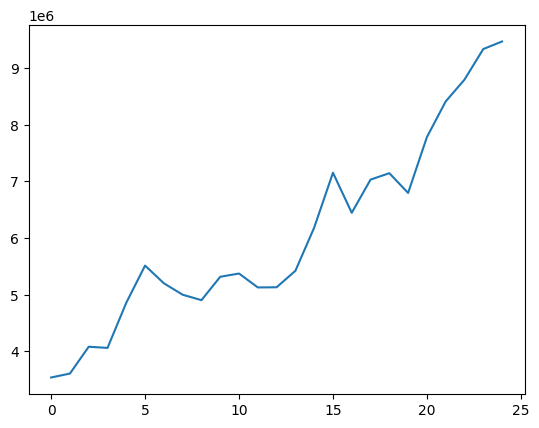

In [77]:
pd_df['sum(quantity)'].plot()

In [78]:
years = to_show[['year']].collect()
sums = to_show[['sum(quantity)']].collect()

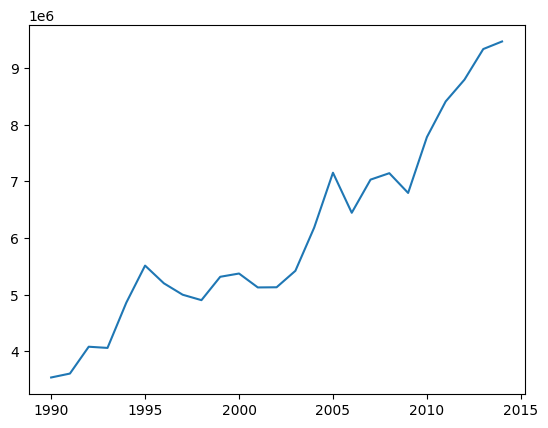

In [79]:
plt.figure()
plt.plot(years, sums)
plt.show()

# Домашнее задание
- Скачайте dataset iris https://drive.google.com/file/d/18ksAxTxBkp15LToEg46BHhwp3sPIoeUU/view?usp=sharing
- Решите домашнее задание - https://colab.research.google.com/drive/1bFOzJNdQzITORtur_m0utqfDJ0QbGe7D?usp=sharing